## 1.1 IMPORTING THE DATA

In [1]:
import pickle 
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from utils import get_vectors



In [4]:
data = pd.read_csv('capitals.txt',delimiter=' ')
data.columns = ['city1' , 'country1' , 'city2' , 'country2']

#print first five elements in the DataFrame
data.head()

,city1,country1,city2,country2
0,Athens,Greece,Bangkok,Thailand
1,Athens,Greece,Beijing,China
2,Athens,Greece,Berlin,Germany
3,Athens,Greece,Bern,Switzerland
4,Athens,Greece,Cairo,Egypt


In [5]:
word_embeddings = pickle.load(open("word_embeddings_subset.p","rb"))
len(word_embeddings)

243

In [7]:
print("dimesnion : {}".format(word_embeddings['Spain'].shape[0]))

dimesnion : 300


## 1.2 Cosine Similiarity
$$\cos (\theta)=\frac{\mathbf{A} \cdot \mathbf{B}}{\|\mathbf{A}\|\|\mathbf{B}\|}=\frac{\sum_{i=1}^{n} A_{i} B_{i}}{\sqrt{\sum_{i=1}^{n} A_{i}^{2}} \sqrt{\sum_{i=1}^{n} B_{i}^{2}}}\tag{1}$$

In [10]:
#UNQ_C1
def cosine_similarity(A,B):
    '''
    Input :
    A: a numpy array which corresponds to a word vector
    B: a numpy array which corresponds to a word vector
    
    Output:
    cos: numerical number representing the cosine similarity between A and B
    '''
    dot  = np.dot(A,B)
    norma = np.linalg.norm(A)
    normb = np.linalg.norm(B)
    cos = dot/(norma*normb)

    return cos


In [11]:
king = word_embeddings['king']
queen= word_embeddings['queen']

cosine_similarity(king,queen)

0.6510957

## 1.3  euclidean distance 
$$ \begin{aligned} d(\mathbf{A}, \mathbf{B})=d(\mathbf{B}, \mathbf{A}) &=\sqrt{\left(A_{1}-B_{1}\right)^{2}+\left(A_{2}-B_{2}\right)^{2}+\cdots+\left(A_{n}-B_{n}\right)^{2}} \\ &=\sqrt{\sum_{i=1}^{n}\left(A_{i}-B_{i}\right)^{2}} \end{aligned}$$

In [25]:
# UNQ_C2 (UNIQUE CELL IDENTIFIER, DO NOT EDIT)
def euclidean(A, B):
    """
    Input:
        A: a numpy array which corresponds to a word vector
        B: A numpy array which corresponds to a word vector
    Output:
        d: numerical number representing the Euclidean distance between A and B.
    """
    d = np.sqrt(np.sum(np.power((A-B),2)))
    return d

In [26]:
euclidean(king, queen)

2.4796925

## 1.4 Finding the country of each capital

In [31]:
# UNQ_C3 (UNIQUE CELL IDENTIFIER, DO NOT EDIT)
def get_country(city1, country1, city2, embeddings):
    """
    Input:
        city1: a string (the capital city of country1)
        country1: a string (the country of capital1)
        city2: a string (the capital city of country2)
        embeddings: a dictionary where the keys are words and values are their embeddings
    Output:
        countries: a dictionary with the most likely country and its similarity score
    """
    group = set((city1,country1,city2))

    city1_emb = embeddings[city1]
    country1_emb = embeddings[country1]
    city2_emb = embeddings[city2]

    vec = country1_emb - city1_emb + city2_emb

    similarity = -1
    country = ''

    for word in embeddings.keys():
        if word not in group:
            word_emb = embeddings[word]
            cur_similarity = cosine_similarity(vec,word_emb)
            if cur_similarity > similarity:
                similarity = cur_similarity
                country = (word,similarity)
    return country



In [32]:
get_country('Athens', 'Greece', 'Cairo', word_embeddings)

('Egypt', 0.7626821)

## 1.5 model accuracy 

In [48]:
# UNQ_C4 (UNIQUE CELL IDENTIFIER, DO NOT EDIT)
def get_accuracy(word_embeddings, data):
    '''
    Input:
        word_embeddings: a dictionary where the key is a word and the value is its embedding
        data: a pandas dataframe containing all the country and capital city pairs
    
    Output:
        accuracy: the accuracy of the model
    '''
    num_correct = 0

    for i, row in data.iterrows():
        city1 = row['city1']
        country1 = row['country1']
        city2 = row['city2']
        country2 = row['country2']

        predicted_country2 , _ = get_country(city1,country1,city2,word_embeddings)

        if predicted_country2 == country2:
            num_correct += 1
    m = len(data)

    accuracy = num_correct / m
    return accuracy




In [49]:

accuracy = get_accuracy(word_embeddings, data)
print(f"Accuracy is {accuracy:.2f}")

Accuracy is 0.92


## plotting the vectors using PCA

In [51]:
# UNQ_C5 (UNIQUE CELL IDENTIFIER, DO NOT EDIT)
def compute_pca(X, n_components=2):
    """
    Input:
        X: of dimension (m,n) where each row corresponds to a word vector
        n_components: Number of components you want to keep.
    Output:
        X_reduced: data transformed in 2 dims/columns + regenerated original data
    """

    ### START CODE HERE (REPLACE INSTANCES OF 'None' with your code) ###
      # mean center the data
    X_demeaned = X - np.mean(X,axis=0)
    print('X_demeaned.shape: ',X_demeaned.shape)
    
    # calculate the covariance matrix
    covariance_matrix = np.cov(X_demeaned, rowvar=False)

    # calculate eigenvectors & eigenvalues of the covariance matrix
    eigen_vals, eigen_vecs = np.linalg.eigh(covariance_matrix, UPLO='L')
    
    # sort eigenvalue in increasing order (get the indices from the sort)
    idx_sorted = np.argsort(eigen_vals)
    
    # reverse the order so that it's from highest to lowest.
    idx_sorted_decreasing = idx_sorted[::-1]
    
    # sort the eigen values by idx_sorted_decreasing
    eigen_vals_sorted = eigen_vals[idx_sorted_decreasing]

    # sort eigenvectors using the idx_sorted_decreasing indices
    eigen_vecs_sorted = eigen_vecs[:,idx_sorted_decreasing]

    # select the first n eigenvectors (n is desired dimension
    # of rescaled data array, or dims_rescaled_data)
    eigen_vecs_subset = eigen_vecs_sorted[:,0:n_components]

    # transform the data by multiplying the transpose of the eigenvectors 
    # with the transpose of the de-meaned data
    # Then take the transpose of that product.
    X_reduced = np.dot(eigen_vecs_subset.transpose(),X_demeaned.transpose()).transpose()

   

    ### END CODE HERE ###

    return X_reduced


In [52]:
# Testing your function
np.random.seed(1)
X = np.random.rand(3, 10)
X_reduced = compute_pca(X, n_components=2)
print("Your original matrix was " + str(X.shape) + " and it became:")
print(X_reduced)

X_demeaned.shape:  (3, 10)
Your original matrix was (3, 10) and it became:
[[ 0.43437323  0.49820384]
 [ 0.42077249 -0.50351448]
 [-0.85514571  0.00531064]]


In [53]:
words = ['oil', 'gas', 'happy', 'sad', 'city', 'town',
         'village', 'country', 'continent', 'petroleum', 'joyful']

# given a list of words and the embeddings, it returns a matrix with all the embeddings
X = get_vectors(word_embeddings, words)

print('You have 11 words each of 300 dimensions thus X.shape is:', X.shape)

You have 11 words each of 300 dimensions thus X.shape is: (11, 300)


X_demeaned.shape:  (11, 300)


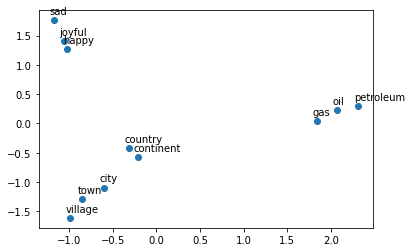

In [54]:
# We have done the plotting for you. Just run this cell.
result = compute_pca(X, 2)
plt.scatter(result[:, 0], result[:, 1])
for i, word in enumerate(words):
    plt.annotate(word, xy=(result[i, 0] - 0.05, result[i, 1] + 0.1))

plt.show()